# 다섯번째 시도

Key Attempts:
- 감독, 배급사, 배우, 장르는 각 레이블의 관객수 중압값으로 치환
- 개봉월, 국가는 0,1 레이블 인코딩
- 감독, 배급사, 배우, 장르, 상영시간 normalise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/join_final.csv', encoding='utf-8-sig', thousands=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   int64  
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   view         6806 non-null   int64  
 8   openMonth    6806 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 478.7+ KB


## 1. 메디안 값 치환

In [5]:
# 감독, 배우, 배급사 각각의 중앙 값 테이블 만들기
director = df.groupby('director').agg({"view":"median"}).reset_index()
actor = df.groupby('actor').agg({"view":"median"}).reset_index()
distributor = df.groupby('distributor').agg({"view":"median"}).reset_index()
genre = df.groupby('genre').agg({"view":"median"}).reset_index()

In [6]:
for idx, row in df.iterrows():
    act = row['actor']
    dist = row['distributor']
    dir = row['director']
    g = row['genre']

    a_val = actor[actor['actor'] == act]['view'].values[0]
    df.loc[idx, 'actor'] = a_val

    dist_val = distributor[distributor['distributor'] == dist]['view'].values[0]
    df.loc[idx, 'distributor'] = dist_val

    dir_val = director[director['director'] == dir]['view'].values[0]
    df.loc[idx, 'director'] = dir_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    df.loc[idx, 'genre'] = g_val

In [7]:
df.head()

,runTm,nation,genre,director,actor,is_adult,distributor,view,openMonth
0,136.0,2,12399.0,954845.5,167141.0,0.0,528537.0,1865469,7
1,119.0,3,137943.0,2674.0,17258.0,0.0,8048.0,24634,1
2,116.0,1,42881.5,6065474.0,3024666.0,1.0,708108.5,943241,4
3,125.0,2,33684.0,507938.5,58644.0,0.0,12057.0,85594,3
4,105.0,1,30069.0,193554.0,193554.0,0.0,62026.0,193554,6


## 2. 관객 수 범주형 변환

In [8]:
for idx, row in df.iterrows():
    val = row['view']
    if val <10000:
        df.loc[idx, 'view'] = 1
    elif val <100000:
        df.loc[idx, 'view'] = 2
    elif val <200000:
        df.loc[idx, 'view'] = 3
    elif val <400000:
        df.loc[idx, 'view'] = 4
    elif val <600000:
        df.loc[idx, 'view'] = 5
    elif val <800000:
        df.loc[idx, 'view'] = 6
    elif val <1000000:
        df.loc[idx, 'view'] = 7
    else:
        df.loc[idx, 'view'] = 8

## 3. 라벨인코딩

In [9]:
y = df['view']
X = df.drop('view', axis=1)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   float64
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   openMonth    6806 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 425.5+ KB


In [11]:
X = pd.get_dummies(data = X, columns=['nation'], prefix='region')

In [12]:
X = pd.get_dummies(data = X, columns=['openMonth'], prefix='month')

In [13]:
X.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'region_1', 'region_2', 'region_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

## 4. 데이터 스플릿

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

## 5. Normalise

In [15]:
X_train

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
619,111.0,17444.0,219824.0,219824.0,0.0,374215.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1314,78.0,39737.0,214097.0,32517.5,0.0,16143.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
861,98.0,76985.0,161342.5,146660.5,1.0,352226.5,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5384,123.0,12399.0,11067.0,11067.0,0.0,50196.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4283,119.0,39737.0,44770.5,49832.0,0.0,7213.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,104.0,30069.0,47923.0,603634.0,0.0,528537.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
726,110.0,30069.0,1049616.5,446780.0,0.0,352226.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1414,166.0,12399.0,477329.5,275944.5,0.0,367308.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1523,100.0,30069.0,60219.0,117006.0,0.0,361682.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# train data의 runTm 컬럼만 normalisation fit 적용
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train.iloc[:,0:6] = mm.fit_transform(X_train.iloc[:, 0:6])

In [17]:
X_train

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
619,0.309091,0.010441,0.019324,0.021998,0.0,0.145299,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1314,0.159091,0.032915,0.018818,0.003168,0.0,0.005895,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
861,0.250000,0.070466,0.014160,0.014643,1.0,0.136739,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5384,0.363636,0.005355,0.000889,0.001012,0.0,0.019153,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4283,0.345455,0.032915,0.003865,0.004909,0.0,0.002419,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,0.277273,0.023169,0.004144,0.060582,0.0,0.205379,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
726,0.304545,0.023169,0.092602,0.044814,0.0,0.136739,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1414,0.559091,0.005355,0.042064,0.027640,0.0,0.142610,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1523,0.259091,0.023169,0.005230,0.011662,0.0,0.140420,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# test 데이터의 runTm 컬럼도 같은 minMax scaler transform
X_test.iloc[:,0:6] = mm.transform(X_test.iloc[:, 0:6])

## 6. Modelling

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_train = lr_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lr_train))
print("test accuracy : ", accuracy_score(y_test, lr_pred))

train accuracy :  0.4987405541561713
test accuracy :  0.480411361410382


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=8)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_train = dt_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, dt_train))
print("test accuracy : ", accuracy_score(y_test, dt_pred))

train accuracy :  0.8058354324097398
test accuracy :  0.722820763956905


Feature: runTm, Score: 0.02184
Feature: genre, Score: 0.01009
Feature: director, Score: 0.73650
Feature: actor, Score: 0.16924
Feature: is_adult, Score: 0.00110
Feature: distributor, Score: 0.04501
Feature: region_1, Score: 0.00141
Feature: region_2, Score: 0.00126
Feature: region_3, Score: 0.00044
Feature: month_1, Score: 0.00135
Feature: month_2, Score: 0.00058
Feature: month_3, Score: 0.00000
Feature: month_4, Score: 0.00054
Feature: month_5, Score: 0.00126
Feature: month_6, Score: 0.00253
Feature: month_7, Score: 0.00101
Feature: month_8, Score: 0.00102
Feature: month_9, Score: 0.00174
Feature: month_10, Score: 0.00118
Feature: month_11, Score: 0.00062
Feature: month_12, Score: 0.00129


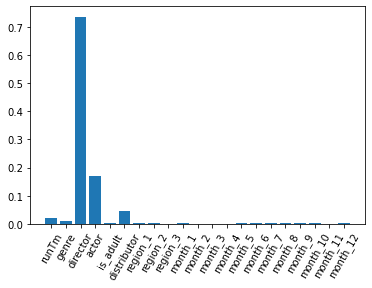

In [21]:
importance = dt_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, rf_train))
print("test accuracy : ", accuracy_score(y_test, rf_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7321253672869735


Feature: runTm, Score: 0.09276
Feature: genre, Score: 0.05561
Feature: director, Score: 0.32189
Feature: actor, Score: 0.25454
Feature: is_adult, Score: 0.01246
Feature: distributor, Score: 0.13889
Feature: region_1, Score: 0.00867
Feature: region_2, Score: 0.00883
Feature: region_3, Score: 0.01285
Feature: month_1, Score: 0.00772
Feature: month_2, Score: 0.00925
Feature: month_3, Score: 0.00787
Feature: month_4, Score: 0.00833
Feature: month_5, Score: 0.00739
Feature: month_6, Score: 0.00673
Feature: month_7, Score: 0.00658
Feature: month_8, Score: 0.00782
Feature: month_9, Score: 0.00847
Feature: month_10, Score: 0.00772
Feature: month_11, Score: 0.00817
Feature: month_12, Score: 0.00745


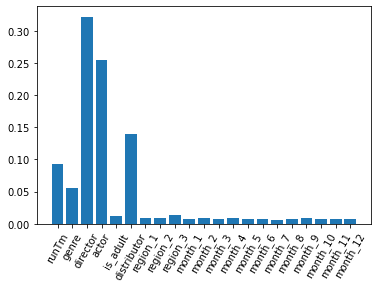

In [23]:
importance = rf_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [24]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average = False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lgbm_train))
print("test accuracy : ", accuracy_score(y_test, lgbm_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7331047992164544


Feature: runTm, Score: 34614.00000
Feature: genre, Score: 14102.00000
Feature: director, Score: 38182.00000
Feature: actor, Score: 39200.00000
Feature: is_adult, Score: 2246.00000
Feature: distributor, Score: 30066.00000
Feature: region_1, Score: 1779.00000
Feature: region_2, Score: 2293.00000
Feature: region_3, Score: 1523.00000
Feature: month_1, Score: 1077.00000
Feature: month_2, Score: 1380.00000
Feature: month_3, Score: 996.00000
Feature: month_4, Score: 1191.00000
Feature: month_5, Score: 895.00000
Feature: month_6, Score: 798.00000
Feature: month_7, Score: 820.00000
Feature: month_8, Score: 1084.00000
Feature: month_9, Score: 1041.00000
Feature: month_10, Score: 1139.00000
Feature: month_11, Score: 1068.00000
Feature: month_12, Score: 1163.00000


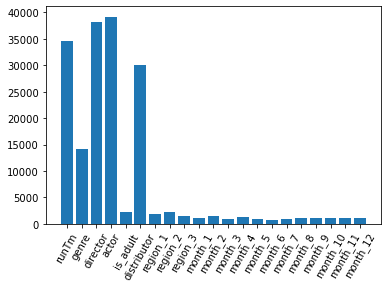

In [25]:
importance = lgbm_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

## 7. Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [27]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=13, n_estimators=100, learning_rate=0.01, max_depth=4)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_train_pd = gb_clf.predict(X_train)

print("ACC : ", accuracy_score(y_test, gb_pred))
print("Fit time : ", time.time() - start_time)

ACC :  0.7536728697355534
Fit time :  8.989070892333984


In [28]:
print("Train Accuracy : ", accuracy_score(y_train, gb_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, gb_pred))

Train Accuracy :  0.7928211586901763
Test Accuracy :  0.7536728697355534


In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.01, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
grid_train_pd = grid.predict(X_train)

print("ACC : ", accuracy_score(y_test, grid_pred))
print("Fit time : ", time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
ACC :  0.7487757100881489
Fit time :  55.42062425613403


In [62]:
print("Train Accuracy : ", accuracy_score(y_train, grid_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, grid_pred))

Train Accuracy :  0.8316540722082284
Test Accuracy :  0.7487757100881489


In [31]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train_copy -= 1
y_test_copy -= 1

In [49]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3)
xgb.fit(X_train.values, y_train_copy.values)

print("Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7512242899118511
Fit time :  3.2442002296447754


In [50]:
print("Train Accuracy : ", accuracy_score(y_train_copy.values, xgb.predict(X_train.values)))
print("Test Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))

Train Accuracy :  0.764063811922754
Test Accuracy :  0.7512242899118511


In [59]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
abc = AdaBoostClassifier(n_estimators=200, base_estimator= dt_clf ,learning_rate=0.01)
abc.fit(X_train.values, y_train.values)
abc_pred = abc.predict(X_test)
abc_train_pd = abc.predict(X_train)

print("Accuracy : ", accuracy_score(y_test.values, abc_pred))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7056807051909892
Fit time :  5.1886608600616455


In [60]:
print("Train Accuracy : ", accuracy_score(y_train, abc_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, abc_pred))

Train Accuracy :  0.9429051217464316
Test Accuracy :  0.7056807051909892


---

## 8. Conclusion

- 세번째 시도와의 차이점으로는 개봉 월을 중앙값 치환이 아닌 레이블 인코딩을 돌렸다.
- 개봉 월 자체가 중요한 feature가 아니어서 세번째와 다섯번째 시도에 뚜렸한 성능 차이는 보이지 않는다.